# Optimalisatie van oplopende visvangst
In deze opdracht moeten we de op zoek gaan naar de optimale starttijd/eindtijd combinaties met de volgende restricties:  
- vangst van maximaal 0.7 MSY (Maximum Sustainable Yield)  
- vangst mag pas over 2 jaar starten  
  
Allereerst importeren we de benodigde libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calculate_step(ramp_start, ramp_end):
    maximum_growth_rate = 0.5 # 1 / year
    carrying_capacity = 2e6 # tons
    maximum_harvest_rate = 0.7 * 2.5e5 # tons / year (MSY)

    end_time = 10. # years
    h = 0.1 # years
    num_steps = int(end_time / h)
    times = h * np.array(range(num_steps + 1))

    fish = np.zeros(num_steps + 1) # tons
    fish[0] = 2e5

    total_harvest = 0.
    is_extinct = False
    
    for step in range(num_steps):
        time = h * step # years
        harvest_factor = 0.0
        if time > ramp_end:
            harvest_factor = 1.0
        elif time > ramp_start:
            harvest_factor = (time - ramp_start) / (ramp_end - ramp_start)    
        harvest_rate = harvest_factor * maximum_harvest_rate
        if is_extinct:
            current_harvest = 0.
            fish_next_step = 0.
        else:
            current_harvest = h * harvest_rate
            fish_next_step = fish[step] + h * (maximum_growth_rate * (1. - fish[step] / carrying_capacity) * fish[step] - harvest_rate)
            if fish_next_step <= 0.:
                is_extinct = True
                current_harvest = fish[step]
                fish_next_step = 0.
        fish[step + 1] = fish_next_step
        total_harvest += current_harvest

    return total_harvest

In [3]:
def total_harvest(st_time):
    
    results = []
    
    start_time = st_time
    step_size = 0.5
    
    for ramp_start in np.arange(start_time, 10.01, step_size): # 10.01 to prevent issues with roundoff errors
        for ramp_end in np.arange(ramp_start, 10.01, step_size): # 10.01 to prevent issues with roundoff errors
            
            total_harvest = calculate_step(ramp_start, ramp_end)
            results.append([ramp_start, ramp_end, total_harvest])
    
    return results

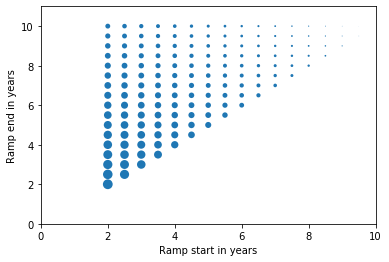

In [4]:
START_TIME = 2. # years

results = total_harvest(START_TIME)


def plot_me():
    # This adjusts the size of the dots to compare them easily. 
    plt.scatter([r[0] for r in results], [r[1] for r in results], [5e-11 * r[2] ** 2 for r in results], edgecolor = 'none')
    axes = plt.gca()
    
    # setting the limits on the axis
    axes.set_xlim(0, 10)
    axes.set_ylim(0, 11)
    
    # setting the labels on the axis
    axes.set_xlabel('Ramp start in years')
    axes.set_ylabel('Ramp end in years')
    
    # showing the plot
    plt.show()

plot_me()